Cargando la base de datos de 50000 reseñas cortas de películas (limitando a 10000 palabras). Carga 25000 para entrenamiento y 25000 para pruebas

In [27]:
import numpy as np
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)
print('Tamaño del conjunto de entrenamiento',train_data.size)
print('Tamaño del conjunto de prueba',test_data.size)

Tamaño del conjunto de entrenamiento 25000
Tamaño del conjunto de prueba 25000


Datos de la primera reseña

In [28]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

Calificación de la primera reseña (0-mala, 1-buena)

In [29]:
train_labels[0]

1

Longitud máxima de una reseña

In [30]:
max([max(sequence) for sequence in train_data])

9999

Decodificando las reseñas a texto

In [31]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])
print(decoded_review)

? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

Codificando la secuencia de números de cada reseña en una matriz ReseñaxPalabra. Esto produce una matriz dispersa de 0's y 1's

In [32]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

Primera reseña codificada en 0 y 1 (ausencia o presencia de palabra)

In [33]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

Dimension de la matriz dispersa de datos de entrenamiento

In [34]:
x_train.shape

(25000, 10000)

Transformar el tipo de las matrices de etiquetas

In [35]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

Definición del modelo

In [36]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

Parametrizar el modelo

In [37]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

Definir el conjunto de validación y quedan 10000 para validacion y 15000 para entrenamiento

In [38]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

Entrenar el modelo

In [39]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=10,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/10
30/30 [==============================] - 2s 42ms/step - loss: 0.5294 - accuracy: 0.7797 - val_loss: 0.4032 - val_accuracy: 0.8604
Epoch 2/10
30/30 [==============================] - 1s 31ms/step - loss: 0.3132 - accuracy: 0.9022 - val_loss: 0.3039 - val_accuracy: 0.8890
Epoch 3/10
30/30 [==============================] - 1s 30ms/step - loss: 0.2290 - accuracy: 0.9242 - val_loss: 0.2905 - val_accuracy: 0.8840
Epoch 4/10
30/30 [==============================] - 1s 30ms/step - loss: 0.1805 - accuracy: 0.9410 - val_loss: 0.2880 - val_accuracy: 0.8837
Epoch 5/10
30/30 [==============================] - 1s 30ms/step - loss: 0.1481 - accuracy: 0.9530 - val_loss: 0.2795 - val_accuracy: 0.8881
Epoch 6/10
30/30 [==============================] - 1s 30ms/step - loss: 0.1220 - accuracy: 0.9617 - val_loss: 0.2935 - val_accuracy: 0.8860
Epoch 7/10
30/30 [==============================] - 1s 30ms/step - loss: 0.1026 - accuracy: 0.9677 - val_loss: 0.3181 - val_accuracy: 0.8811
Epoch 8/10
30

In [40]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Graficar la pérdida del conjunto de validación durante el entrenamiento

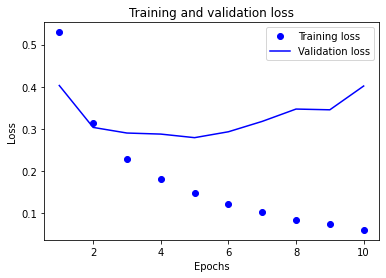

In [41]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

Graficar la precisión (accuracy) del conjunto de validación durante el entrenamiento

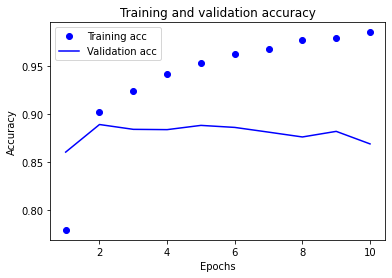

In [42]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [43]:
test_loss , test_acc = model.evaluate(x_test, y_test)
print('test_acc: ', test_acc)
print('test_loss: ',test_loss)

782/782 [==============================] - 1s 2ms/step - loss: 0.4472 - accuracy: 0.8550
test_acc:  0.8550400137901306
test_loss:  0.44717249274253845


# Reentrenar un modelo, dejando los ejemplos de validación para el entrenamiento

In [44]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
test_loss , test_acc = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 2s 25ms/step - loss: 0.4463 - accuracy: 0.8172
Epoch 2/4
49/49 [==============================] - 1s 25ms/step - loss: 0.2534 - accuracy: 0.9079
Epoch 3/4
49/49 [==============================] - 1s 25ms/step - loss: 0.1972 - accuracy: 0.9296
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.3029 - accuracy: 0.8807


In [45]:
print('test_acc: ', test_acc)
print('test_loss: ',test_loss)

test_acc:  0.8807200193405151
test_loss:  0.302931547164917


Resumen de la red neuronal. Los parámetros se calculan (entradas x neuronas) + neuronas

In [46]:
print(model.summary())

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 16)                160016    
                                                                 
 dense_16 (Dense)            (None, 16)                272       
                                                                 
 dense_17 (Dense)            (None, 1)                 17        
                                                                 
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________
None


Ejercicios:
1. Trate con menos o más neuronas en las capas intermedias (4, 8 ... 32, 64, ...)
2. Intente con mse en lugar de binary_crossentropy
3. Disminuya las pasadas (epoch) ¿Qué sucede con el sobreajuste u overfitting?

Ejercicios:
-----------

Agregue regularización y dropout valiendose de los siguientes códigos y grafique la pérdida y accuracy con respecto al modelo original ...








CODIGO CON REGULARIZACIÓN L2
-----------------------------

In [47]:
from tensorflow.keras import regularizers
model = keras.Sequential([
   layers.Dense(16,
   kernel_regularizer=regularizers.l2(0.002),
   activation='relu'),
   layers.Dense(16,
   kernel_regularizer=regularizers.l2(0.002),
   activation='relu'),
   layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='rmsprop',
    loss='binary_crossentropy',
    metrics=['accuracy'])

hist_l2_reg = model.fit(
    x_train, y_train,
    epochs=20, batch_size=512, 
    validation_split=0.4)


Epoch 1/20
30/30 [==============================] - 2s 52ms/step - loss: 0.5922 - accuracy: 0.7852 - val_loss: 0.5125 - val_accuracy: 0.8006
Epoch 2/20
30/30 [==============================] - 1s 33ms/step - loss: 0.3995 - accuracy: 0.8969 - val_loss: 0.3959 - val_accuracy: 0.8787
Epoch 3/20
30/30 [==============================] - 1s 33ms/step - loss: 0.3367 - accuracy: 0.9100 - val_loss: 0.3634 - val_accuracy: 0.8898
Epoch 4/20
30/30 [==============================] - 1s 33ms/step - loss: 0.3024 - accuracy: 0.9257 - val_loss: 0.3596 - val_accuracy: 0.8880
Epoch 5/20
30/30 [==============================] - 1s 34ms/step - loss: 0.2822 - accuracy: 0.9312 - val_loss: 0.3539 - val_accuracy: 0.8887
Epoch 6/20
30/30 [==============================] - 1s 33ms/step - loss: 0.2681 - accuracy: 0.9364 - val_loss: 0.3559 - val_accuracy: 0.8877
Epoch 7/20
30/30 [==============================] - 1s 34ms/step - loss: 0.2572 - accuracy: 0.9387 - val_loss: 0.3704 - val_accuracy: 0.8808
Epoch 8/20
30

In [48]:
hist_l2_reg_dict = hist_l2_reg.hist_l2_reg
hist_l2_reg_dict.keys()

AttributeError: ignored

In [50]:
import matplotlib.pyplot as plt
hist_l2_reg_dict = hist_l2_reg.hist_l2_reg
loss_values = hist_l2_reg_dict["loss"]
val_loss_values = hist_l2_reg_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()
plt.clf()
acc = hist_l2_reg_dict["accuracy"]
val_acc = hist_l2_reg_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

AttributeError: ignored

CÓDIGO CON REGULARIZACIÓN L1 y L2
---------------------------------

In [ ]:
from keras import regularizers
regularizers.l1(0.001)
regularizers.l1_l2(l1=0.001, l2=0.001)

CÓDIGO CON DROPOUT
------------------

In [ ]:
model = keras.Sequential([
  layers.Dense(16, activation='relu'),
  layers.Dropout(0.5),
  layers.Dense(16, activation='relu'),
  layers.Dropout(0.5),
  layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer='rmsprop',  
    loss='binary_crossentropy',
    metrics=['accuracy'])
hist_dropout = model.fit(
    x_train, y_train,
    epochs=20, batch_size=512, 
    validation_split=0.4)